In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.pyplot import rc_context
import os
import seaborn as sns
import importlib
import re

from scipy import stats

In [46]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=150, facecolor='white', dpi_save=900)

scanpy==1.9.3 anndata==0.10.8 umap==0.5.3 numpy==1.23.5 scipy==1.11.4 pandas==2.2.1 scikit-learn==1.5.1 statsmodels==0.14.2 python-igraph==0.11.6 louvain==0.8.0 pynndescent==0.5.12


In [47]:
# sns.set_theme(style="c")
# sns.set_theme(style="whitegrid", palette='tab10')
sns.set_theme(style="white", palette='deep')

---

In [4]:
!pwd

/data/tcl/Project/ADFCA/script2/GitHub_cell/2020_natureMedicine_TREM2_5xFAD


In [ ]:
# os.chdir("../")

# Load all files

In [5]:
figureFolder = '/data/tcl/Project/ADFCA/Analysis/Figure'
os.makedirs(figureFolder, exist_ok=True)

In [6]:
figure4Folder=f'{figureFolder}/Figure4'
os.makedirs(figure4Folder, exist_ok=True)
figure4PicFolder=f'{figure4Folder}/pic'
os.makedirs(figure4PicFolder, exist_ok=True)

In [7]:
dataName = '2020_natureMedicine_TREM2_5xFAD'
nm2020_Folder=f'{figure4Folder}/{dataName}'
os.makedirs(nm2020_Folder, exist_ok=True)
nm2020_PicFolder=f'{nm2020_Folder}/pic'
os.makedirs(nm2020_PicFolder, exist_ok=True)

In [8]:
nm2020_Folder

'/data/tcl/Project/ADFCA/Analysis/Figure/Figure7/2020_natureMedicine_TREM2_5xFAD'

In [9]:
rawDataFolder=f'/data/tcl/dataset/mouseAtlas/2020_natureMedicine_TREM2_5xFAD'

In [10]:
# scDblFinderFolder='Analysis/2.scDblFinder_HT'
scDblFinderFolder='/data/tcl/Project/ADFCA/Analysis/Figure/Figure4/2020_natureMedicine_TREM2_5xFAD/2.scDblFinder'
os.makedirs(scDblFinderFolder, exist_ok=True)
picFolderPath=f'{scDblFinderFolder}/pic'
os.makedirs(picFolderPath, exist_ok=True)
barcodeNoDoubletFolder=f'{scDblFinderFolder}/barcodeNoDoublet'
os.makedirs(barcodeNoDoubletFolder, exist_ok=True)
metadataFolder=f'{scDblFinderFolder}/metadata'
os.makedirs(metadataFolder, exist_ok=True)

In [12]:
sample_Df = pd.read_csv(f'{rawDataFolder}/SraRunTable__2020_natureMedicine_TREM2_5xFAD.csv')
sample_Df['sampleAgeGeno'] = pd.Categorical( sample_Df['Sample Name'] + '__' + sample_Df['AGE'] + '__' + sample_Df['mouse_genotype'] )
sample_D = dict(zip(sample_Df['Sample Name'], sample_Df['sampleAgeGeno']))
sample_D

{'GSM4173504': 'GSM4173504__7 months__wt',
 'GSM4173505': 'GSM4173505__7 months__wt',
 'GSM4173506': 'GSM4173506__7 months__wt',
 'GSM4173507': 'GSM4173507__7 months__Trem2-/-',
 'GSM4173508': 'GSM4173508__7 months__Trem2-/-',
 'GSM4173509': 'GSM4173509__7 months__Trem2-/-',
 'GSM4173510': 'GSM4173510__7 months__5XFAD',
 'GSM4173511': 'GSM4173511__7 months__5XFAD',
 'GSM4173512': 'GSM4173512__7 months__5XFAD',
 'GSM4173513': 'GSM4173513__7 months__Trem2-/- 5XFAD',
 'GSM4173514': 'GSM4173514__7 months__Trem2-/- 5XFAD',
 'GSM4173515': 'GSM4173515__7 months__Trem2-/- 5XFAD',
 'GSM4160643': 'GSM4160643__15 months__wt',
 'GSM4160644': 'GSM4160644__15 months__Trem2-/-',
 'GSM4160645': 'GSM4160645__15 months__5XFAD',
 'GSM4160646': 'GSM4160646__15 months__Trem2-/- 5XFAD',
 'GSM4160647': 'GSM4160647__15 months__wt',
 'GSM4160648': 'GSM4160648__15 months__Trem2-/-',
 'GSM4160649': 'GSM4160649__15 months__5XFAD',
 'GSM4160650': 'GSM4160650__15 months__Trem2-/- 5XFAD'}

In [13]:
sample_L = [mtxFile.split('/')[-1].split('_matrix.mtx.gz')[0] for mtxFile in sorted(glob(f'{rawDataFolder}/dataset/*_matrix.mtx.gz'))]
sample_L

['GSM4160643_WT_Cor',
 'GSM4160644_Trem2_KO_Cor',
 'GSM4160645_WT_5XFAD_Cor',
 'GSM4160646_Trem2_KO_5XFAD_Cor',
 'GSM4160647_WT_Hip',
 'GSM4160648_Trem2_KO_Hip',
 'GSM4160649_WT_5XFAD_Hip',
 'GSM4160650_Trem2_KO_5XFAD_Hip',
 'GSM4173504_WT_1',
 'GSM4173505_WT_2',
 'GSM4173506_WT_3',
 'GSM4173507_Trem2_KO_1',
 'GSM4173508_Trem2_KO_2',
 'GSM4173509_Trem2_KO_3',
 'GSM4173510_WT_5XFAD_1',
 'GSM4173511_WT_5XFAD_2',
 'GSM4173512_WT_5XFAD_3',
 'GSM4173513_Trem2_KO_5XFAD_1',
 'GSM4173514_Trem2_KO_5XFAD_2',
 'GSM4173515_Trem2_KO_5XFAD_3']

In [14]:
# QC, concat
cellqcFolder=f'{nm2020_Folder}/3.cellQC_concat_scDblFinder'
os.makedirs(cellqcFolder, exist_ok=True)
cellqcPicFolderPath=f'{cellqcFolder}/pic'
os.makedirs(cellqcPicFolderPath, exist_ok=True)

# Cell# summary

In [15]:
cellN_Df=pd.read_csv(f'{scDblFinderFolder}/cellN_Df__scDblFinderSummary.csv')
cellN_Df.head()

,scExpName,TotalCellNum,scDblFinderCellN
0,GSM4160643_WT_Cor,10549,9521
1,GSM4160644_Trem2_KO_Cor,6912,6391
2,GSM4160645_WT_5XFAD_Cor,4816,4553
3,GSM4160646_Trem2_KO_5XFAD_Cor,6670,5438
4,GSM4160647_WT_Hip,3389,3204


# Use cellbender matrix

In [20]:
adata.obs

,n_genes,expName,dataset
AAACCTGAGAGGTACC-1_GSM4173515,2924,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
AAACCTGAGCAGGTCA-1_GSM4173515,2800,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
AAACCTGAGTGGTAGC-1_GSM4173515,2436,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
AAACCTGCACCACCAG-1_GSM4173515,1023,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
AAACCTGCACCGCTAG-1_GSM4173515,2874,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
...,...,...,...
TTTGTCATCAGCTGGC-1_GSM4173515,905,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
TTTGTCATCCCAAGTA-1_GSM4173515,3220,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
TTTGTCATCCGCAAGC-1_GSM4173515,3670,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD
TTTGTCATCGAACTGT-1_GSM4173515,2487,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


GSM4160643 wt 15 months


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  9521
Cell# after CellQC:  8341
GSM4160644 Trem2-/- 15 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  6391
Cell# after CellQC:  5500
GSM4160645 5XFAD 15 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  4553
Cell# after CellQC:  3582
GSM4160646 Trem2-/- 5XFAD 15 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  5438
Cell# after CellQC:  1584
GSM4160647 wt 15 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  3204
Cell# after CellQC:  2333
GSM4160648 Trem2-/- 15 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  2815
Cell# after CellQC:  1957
GSM4160649 5XFAD 15 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  3812
Cell# after CellQC:  2827
GSM4160650 Trem2-/- 5XFAD 15 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  3060
Cell# after CellQC:  2354
GSM4173504 wt 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  9163
Cell# after CellQC:  8797
GSM4173505 wt 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  6321
Cell# after CellQC:  6040
GSM4173506 wt 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:625: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pl.figure(
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicit

Cell# before CellQC:  7424
Cell# after CellQC:  7187
GSM4173507 Trem2-/- 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  6486
Cell# after CellQC:  6018
GSM4173508 Trem2-/- 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  7505
Cell# after CellQC:  7259
GSM4173509 Trem2-/- 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  7511
Cell# after CellQC:  7125
GSM4173510 5XFAD 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  6472
Cell# after CellQC:  6243
GSM4173511 5XFAD 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  4723
Cell# after CellQC:  4257
GSM4173512 5XFAD 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  7304
Cell# after CellQC:  6802
GSM4173513 Trem2-/- 5XFAD 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  6370
Cell# after CellQC:  6110
GSM4173514 Trem2-/- 5XFAD 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  7493
Cell# after CellQC:  7088
GSM4173515 Trem2-/- 5XFAD 7 months


<ipython-input-31-bdaf9cc3fd5f>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expName=row[0]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/anndata/__init__.py:55: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf

/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/scanpy/plotting/_utils.py:715: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color = color[sort]
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/data/tcl/miniconda3/envs/scvi/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Cell# before CellQC:  6103
Cell# after CellQC:  5694


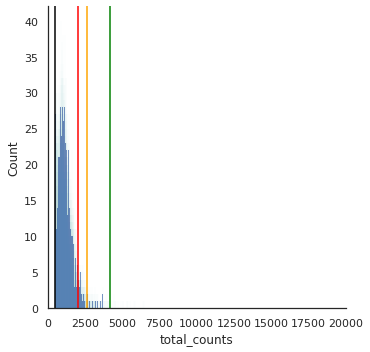

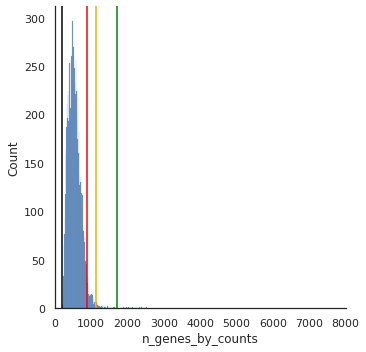

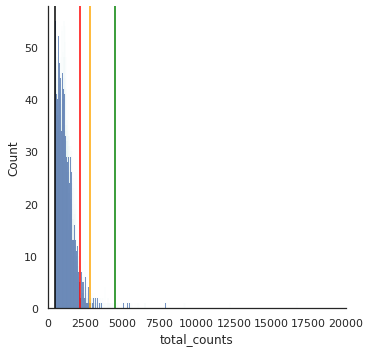

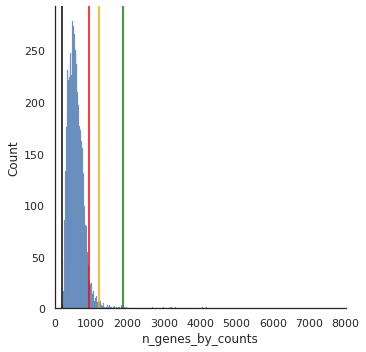

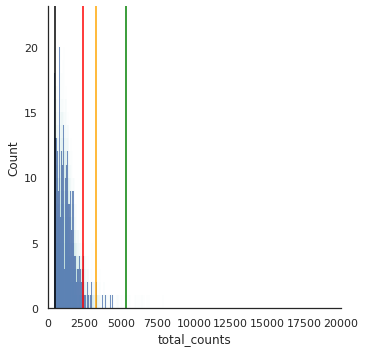

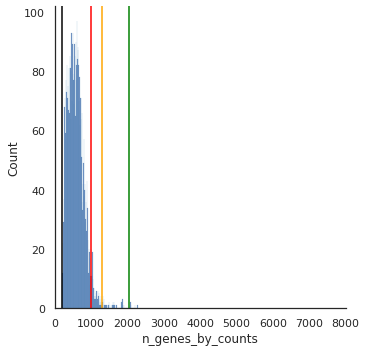

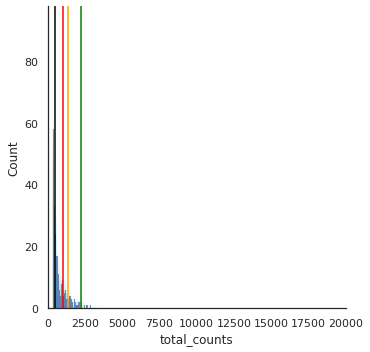

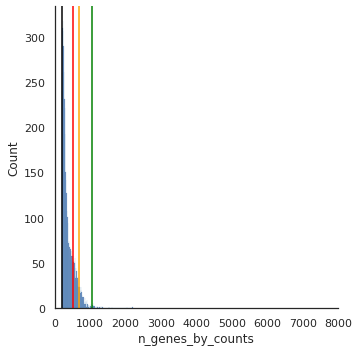

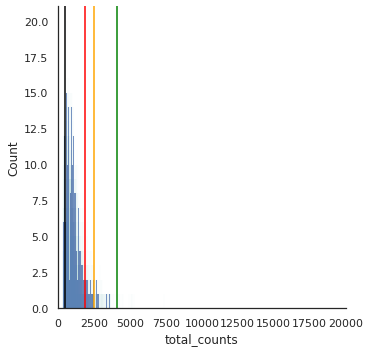

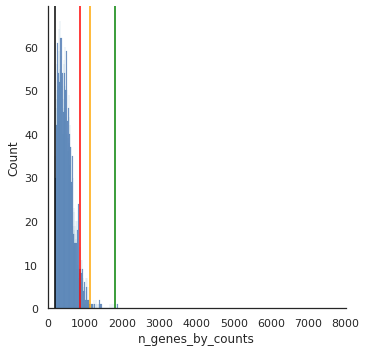

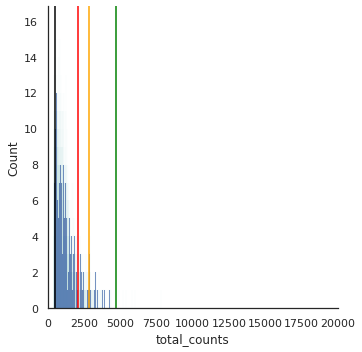

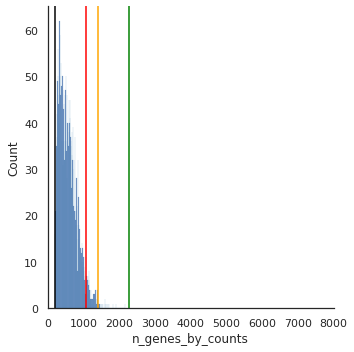

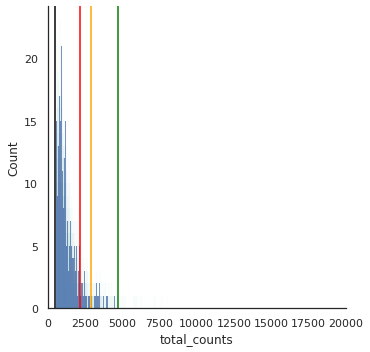

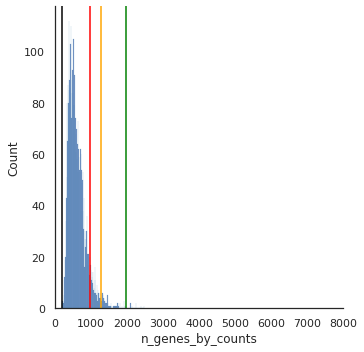

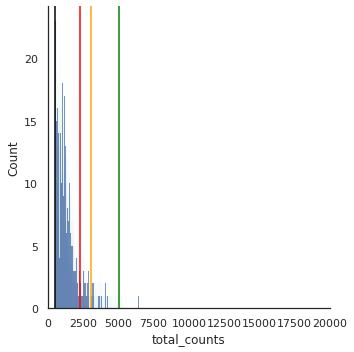

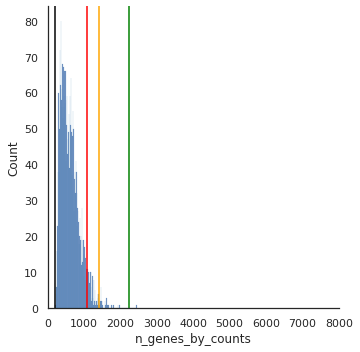

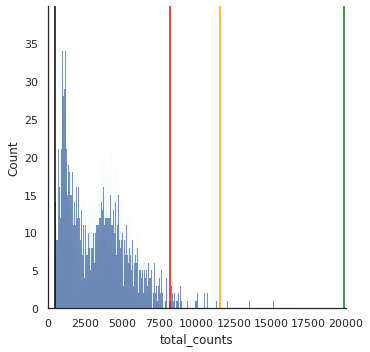

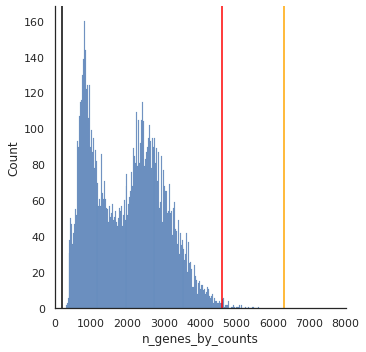

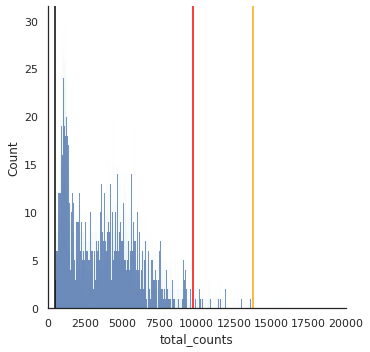

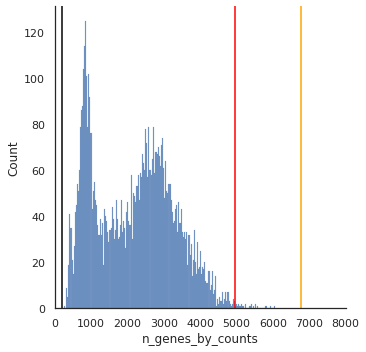

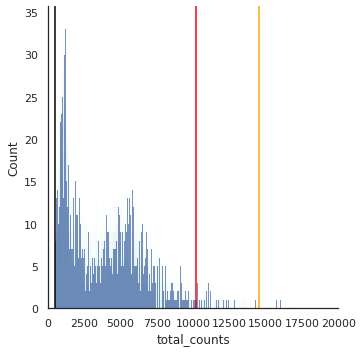

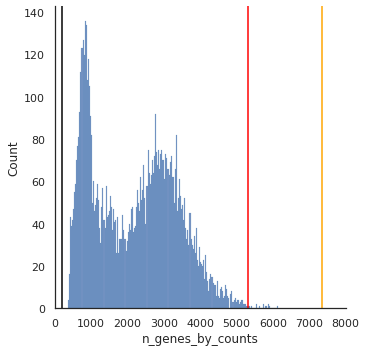

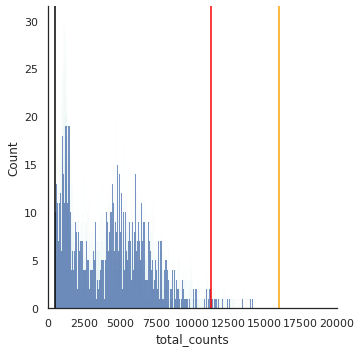

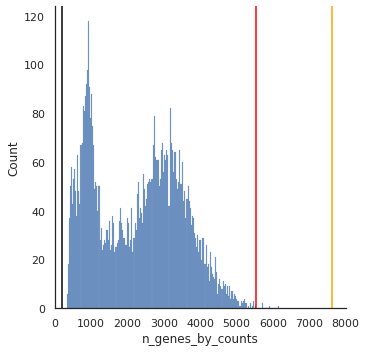

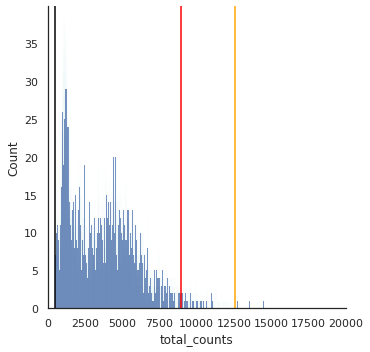

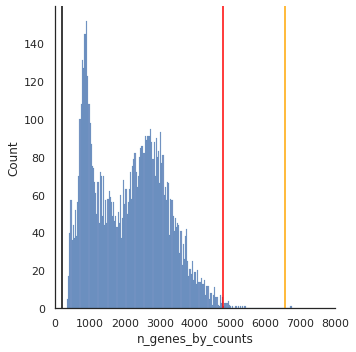

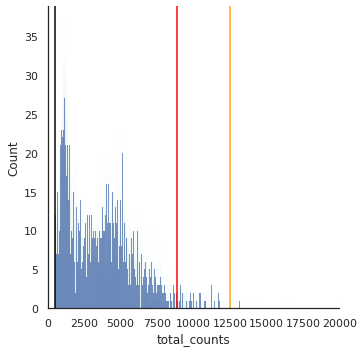

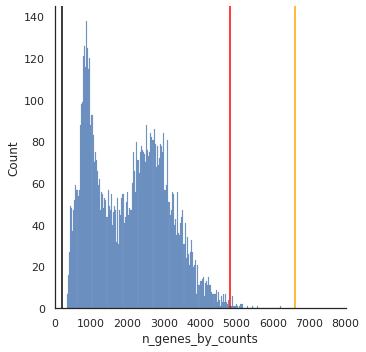

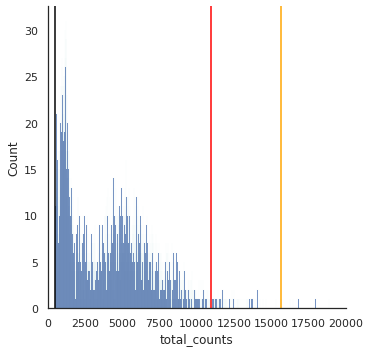

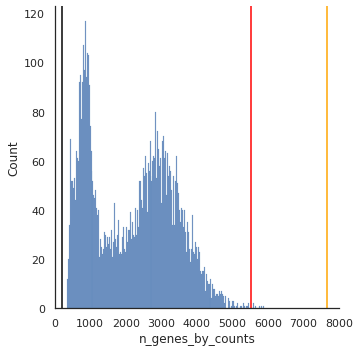

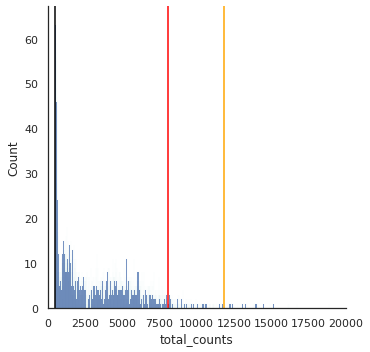

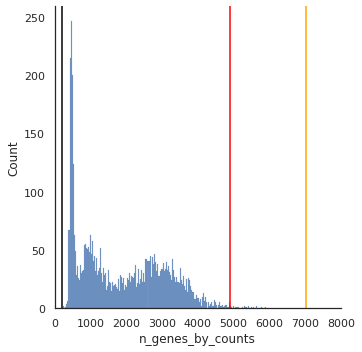

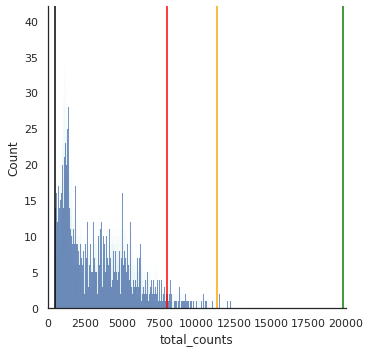

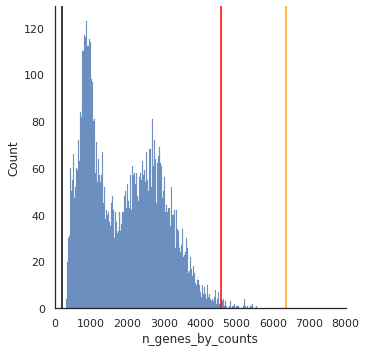

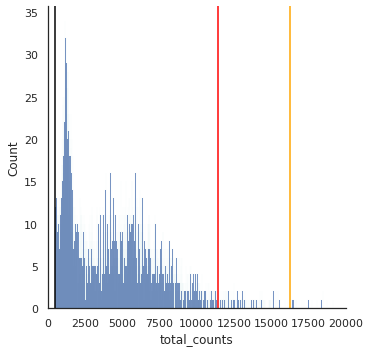

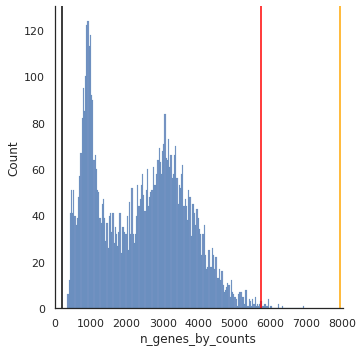

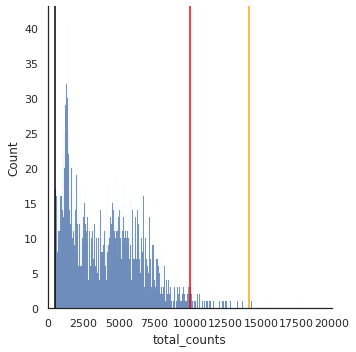

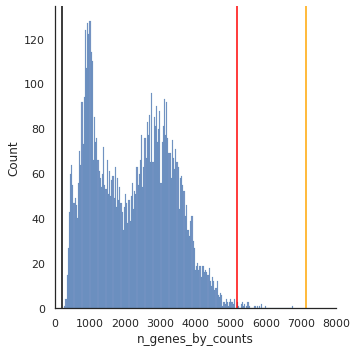

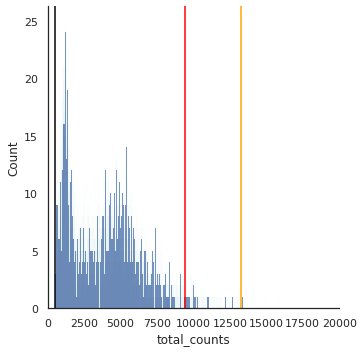

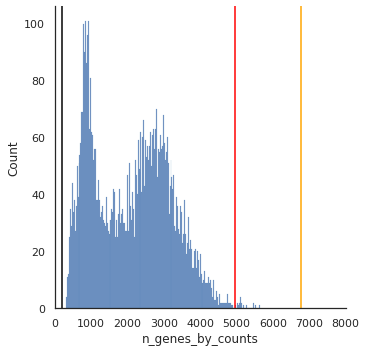

In [31]:
adata_L = []
remainCellN_L = []
ambientTool = 'cellbender'

for index, row in cellN_Df.iterrows():
    expName=row[0]
    # print(expName,)
    
    adata=sc.read(f'{scDblFinderFolder}/adata_scDblFinder_{expName}.h5ad')
    adata.obs['expName'] = expName
    adata.obs['dataset'] = dataName
    
    geoID = expName.split('_')[0]    
    age, genotype = sample_D[geoID].split('__')[1:]
    print(geoID, genotype, age)
    adata.obs['geoID'] = geoID
    adata.obs['genotype'] = genotype
    adata.obs['age'] = age
    
    # mt ratio
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    
    sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
                 jitter=0.4, multi_panel=True, save=f'_{ambientTool}_cellQC_{expName}.pdf', show=False)
    sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='pct_counts_mt', save=f'_cellQC_{expName}.pdf', show=False)
    
    
    ### plot 3,5,10 MAD
    median_n_genesByCounts = np.quantile(adata.obs.n_genes_by_counts.to_list(),  0.5)
    median_totalCounts = np.quantile(adata.obs.total_counts.to_list(),  0.5)
    madNum=3
    
    ### total_counts
    p=sns.displot(adata.obs, x="total_counts", edgecolor='steelblue', line_kws={'lw': 0}, bins=2000).set(xlim=(0,20000)) # bins=int(len(adata)/20), 
    # p.fig.set_dpi(300)
    plt.axvline(median_totalCounts+ stats.median_abs_deviation(adata.obs.total_counts)*3, color='red')
    plt.axvline(median_totalCounts+ stats.median_abs_deviation(adata.obs.total_counts)*5, color='orange')
    plt.axvline(median_totalCounts+ stats.median_abs_deviation(adata.obs.total_counts)*10, color='green')
    plt.axvline(500, color='black')
    plt.savefig(f'{cellqcPicFolderPath}/totalCounts_MAD_{ambientTool}_{expName}.pdf')
    
    ### n_genes_by_counts
    p=sns.displot(adata.obs, x="n_genes_by_counts", edgecolor='steelblue', line_kws={'lw': 0}, bins=200).set(xlim=(0,8000)) # bins=int(len(adata)/20), 
    # p.fig.set_dpi(300)
    plt.axvline(median_n_genesByCounts+ stats.median_abs_deviation(adata.obs.n_genes_by_counts)*3, color='red')
    plt.axvline(median_n_genesByCounts+ stats.median_abs_deviation(adata.obs.n_genes_by_counts)*5, color='orange')
    plt.axvline(median_n_genesByCounts+ stats.median_abs_deviation(adata.obs.n_genes_by_counts)*10, color='green')
    plt.axvline(200, color='black')
    plt.savefig(f'{cellqcPicFolderPath}/nGenes_MAD_{ambientTool}_{expName}.pdf')
    
    ### Filter
    ngeneMAD = median_n_genesByCounts + \
        stats.median_abs_deviation(adata.obs.n_genes_by_counts)*madNum
    totalCountMAD = median_totalCounts+ \
        stats.median_abs_deviation(adata.obs.total_counts)*madNum

    print('Cell# before CellQC: ', len(adata))
    adata = adata[adata.obs.n_genes_by_counts > 200, :]
    adata = adata[adata.obs.n_genes_by_counts <= ngeneMAD, :]
    adata = adata[adata.obs.total_counts > 500, :]
    adata = adata[adata.obs.total_counts <= totalCountMAD, :]
    adata = adata[adata.obs.pct_counts_mt <= 5, :]
    print('Cell# after CellQC: ', len(adata))
    
    adata_L.append(adata)
    remainCellN_L.append(len(adata))
    
for x in os.listdir('figures/'): 
    os.replace(f'figures/{x}', f'{cellqcPicFolderPath}/{x}')

In [32]:
adata_concat = adata_L[0].concatenate(adata_L[1:], join='outer')
# adata_concat.obs.index = [index[:-2] for index in adata_concat.obs.index]
# adata_concat

<ipython-input-32-0c81404e2fc9>:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_concat = adata_L[0].concatenate(adata_L[1:], join='outer')


In [33]:
adata_concat.obs

,n_genes,expName,dataset,geoID,genotype,age,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batch
AAACCTGAGAGTAAGG-1_GSM4160643-0,403,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,403,952.0,1.0,0.105042,0
AAACCTGAGCATGGCA-1_GSM4160643-0,295,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,295,668.0,8.0,1.197605,0
AAACCTGAGCGATGAC-1_GSM4160643-0,769,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,769,1447.0,8.0,0.552868,0
AAACCTGAGTCAAGCG-1_GSM4160643-0,878,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,878,1893.0,9.0,0.475436,0
AAACCTGAGTGACATA-1_GSM4160643-0,383,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,383,821.0,1.0,0.121803,0
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGCTGGC-1_GSM4173515-19,905,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,905,1327.0,7.0,0.527506,19
TTTGTCATCCCAAGTA-1_GSM4173515-19,3220,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,3220,5727.0,4.0,0.069845,19
TTTGTCATCCGCAAGC-1_GSM4173515-19,3670,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,3669,7149.0,3.0,0.041964,19
TTTGTCATCGAACTGT-1_GSM4173515-19,2487,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,2485,4117.0,3.0,0.072869,19


In [34]:
adata_concat

AnnData object with n_obs × n_vars = 107098 × 22459
    obs: 'n_genes', 'expName', 'dataset', 'geoID', 'genotype', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'
    var: 'geneID-0', 'geneName-0', 'n_cells-0', 'mt-0', 'n_cells_by_counts-0', 'mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'geneID-1', 'geneName-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'geneID-10', 'geneName-10', 'n_cells-10', 'mt-10', 'n_cells_by_counts-10', 'mean_counts-10', 'pct_dropout_by_counts-10', 'total_counts-10', 'geneID-11', 'geneName-11', 'n_cells-11', 'mt-11', 'n_cells_by_counts-11', 'mean_counts-11', 'pct_dropout_by_counts-11', 'total_counts-11', 'geneID-12', 'geneName-12', 'n_cells-12', 'mt-12', 'n_cells_by_counts-12', 'mean_counts-12', 'pct_dropout_by_counts-12', 'total_counts-12', 'geneID-13', 'geneName-13', 'n_cells-13', 'mt-13', 'n_cells_by_counts-13', 'mean_counts-13', 'pct_dropou

In [35]:
adata_concat.obs

,n_genes,expName,dataset,geoID,genotype,age,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,batch
AAACCTGAGAGTAAGG-1_GSM4160643-0,403,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,403,952.0,1.0,0.105042,0
AAACCTGAGCATGGCA-1_GSM4160643-0,295,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,295,668.0,8.0,1.197605,0
AAACCTGAGCGATGAC-1_GSM4160643-0,769,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,769,1447.0,8.0,0.552868,0
AAACCTGAGTCAAGCG-1_GSM4160643-0,878,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,878,1893.0,9.0,0.475436,0
AAACCTGAGTGACATA-1_GSM4160643-0,383,GSM4160643_WT_Cor,2020_natureMedicine_TREM2_5xFAD,GSM4160643,wt,15 months,383,821.0,1.0,0.121803,0
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGCTGGC-1_GSM4173515-19,905,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,905,1327.0,7.0,0.527506,19
TTTGTCATCCCAAGTA-1_GSM4173515-19,3220,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,3220,5727.0,4.0,0.069845,19
TTTGTCATCCGCAAGC-1_GSM4173515-19,3670,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,3669,7149.0,3.0,0.041964,19
TTTGTCATCGAACTGT-1_GSM4173515-19,2487,GSM4173515_Trem2_KO_5XFAD_3,2020_natureMedicine_TREM2_5xFAD,GSM4173515,Trem2-/- 5XFAD,7 months,2485,4117.0,3.0,0.072869,19


In [36]:
adata_concat.var

,geneID-0,geneName-0,n_cells-0,mt-0,n_cells_by_counts-0,mean_counts-0,pct_dropout_by_counts-0,total_counts-0,geneID-1,geneName-1,...,pct_dropout_by_counts-8,total_counts-8,geneID-9,geneName-9,n_cells-9,mt-9,n_cells_by_counts-9,mean_counts-9,pct_dropout_by_counts-9,total_counts-9
0610005C13Rik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.607116,38.0,ENSMUSG00000109644,0610005C13Rik,24.0,False,22.0,0.003480,99.651954,22.0
0610007P14Rik,ENSMUSG00000021252,0610007P14Rik,1753.0,False,1459.0,0.169310,84.675979,1612.0,ENSMUSG00000021252,0610007P14Rik,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009B22Rik,ENSMUSG00000007777,0610009B22Rik,298.0,False,259.0,0.027938,97.279698,266.0,ENSMUSG00000007777,0610009B22Rik,...,96.453127,336.0,ENSMUSG00000007777,0610009B22Rik,271.0,False,224.0,0.036703,96.456257,232.0
0610009L18Rik,ENSMUSG00000043644,0610009L18Rik,135.0,False,118.0,0.012394,98.760634,118.0,ENSMUSG00000043644,0610009L18Rik,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0610009O20Rik,ENSMUSG00000024442,0610009O20Rik,272.0,False,233.0,0.024997,97.552778,238.0,ENSMUSG00000024442,0610009O20Rik,...,81.970970,1906.0,ENSMUSG00000024442,0610009O20Rik,1420.0,False,1192.0,0.223857,81.142224,1415.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mt-Nd3,ENSMUSG00000064360,mt-Nd3,1423.0,True,1164.0,0.220880,87.774393,2103.0,ENSMUSG00000064360,mt-Nd3,...,93.855724,833.0,ENSMUSG00000064360,mt-Nd3,734.0,True,615.0,0.156621,90.270527,990.0
mt-Nd4,ENSMUSG00000064363,mt-Nd4,3634.0,True,3093.0,0.990967,67.513917,9435.0,ENSMUSG00000064363,mt-Nd4,...,89.272072,1933.0,ENSMUSG00000064363,mt-Nd4,1383.0,True,1179.0,0.374624,81.347888,2368.0
mt-Nd4l,ENSMUSG00000065947,mt-Nd4l,388.0,True,314.0,0.044533,96.702027,424.0,ENSMUSG00000065947,mt-Nd4l,...,75.542944,6610.0,ENSMUSG00000065947,mt-Nd4l,2539.0,True,2172.0,1.100459,65.638348,6956.0
mt-Nd5,ENSMUSG00000064367,mt-Nd5,884.0,True,731.0,0.121206,92.322235,1154.0,ENSMUSG00000064367,mt-Nd5,...,89.763178,1720.0,ENSMUSG00000064367,mt-Nd5,1110.0,True,928.0,0.278279,85.318779,1759.0


In [37]:
# adata_concat.var = adata_concat.var.iloc[:,[2]]
adata_concat.var = pd.DataFrame( index=adata_concat.var_names.to_list() )
adata_concat.var

""
0610005C13Rik
0610007P14Rik
0610009B22Rik
0610009L18Rik
0610009O20Rik
...
mt-Nd3
mt-Nd4
mt-Nd4l
mt-Nd5


In [38]:
adata_concat

AnnData object with n_obs × n_vars = 107098 × 22459
    obs: 'n_genes', 'expName', 'dataset', 'geoID', 'genotype', 'age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch'

In [39]:
adata_concat.obs.genotype.value_counts()

genotype
wt                32698
Trem2-/-          27859
5XFAD             23711
Trem2-/- 5XFAD    22830
Name: count, dtype: int64

In [40]:
adata_concat.write(f'{cellqcFolder}/3.cellbender_adata_concat.h5ad')

# Summarize & plot all cellN

In [42]:
cellN_Df['cellQC'] = remainCellN_L

In [43]:
decontxSummaryDf_long = cellN_Df.copy()
decontxSummaryDf_long = decontxSummaryDf_long.melt(id_vars= 'scExpName', var_name= 'process', value_name='nuclei#')
decontxSummaryDf_long

,scExpName,process,nuclei#
0,GSM4160643_WT_Cor,TotalCellNum,10549
1,GSM4160644_Trem2_KO_Cor,TotalCellNum,6912
2,GSM4160645_WT_5XFAD_Cor,TotalCellNum,4816
3,GSM4160646_Trem2_KO_5XFAD_Cor,TotalCellNum,6670
4,GSM4160647_WT_Hip,TotalCellNum,3389
5,GSM4160648_Trem2_KO_Hip,TotalCellNum,2959
6,GSM4160649_WT_5XFAD_Hip,TotalCellNum,4010
7,GSM4160650_Trem2_KO_5XFAD_Hip,TotalCellNum,3215
8,GSM4173504_WT_1,TotalCellNum,10122
9,GSM4173505_WT_2,TotalCellNum,6920


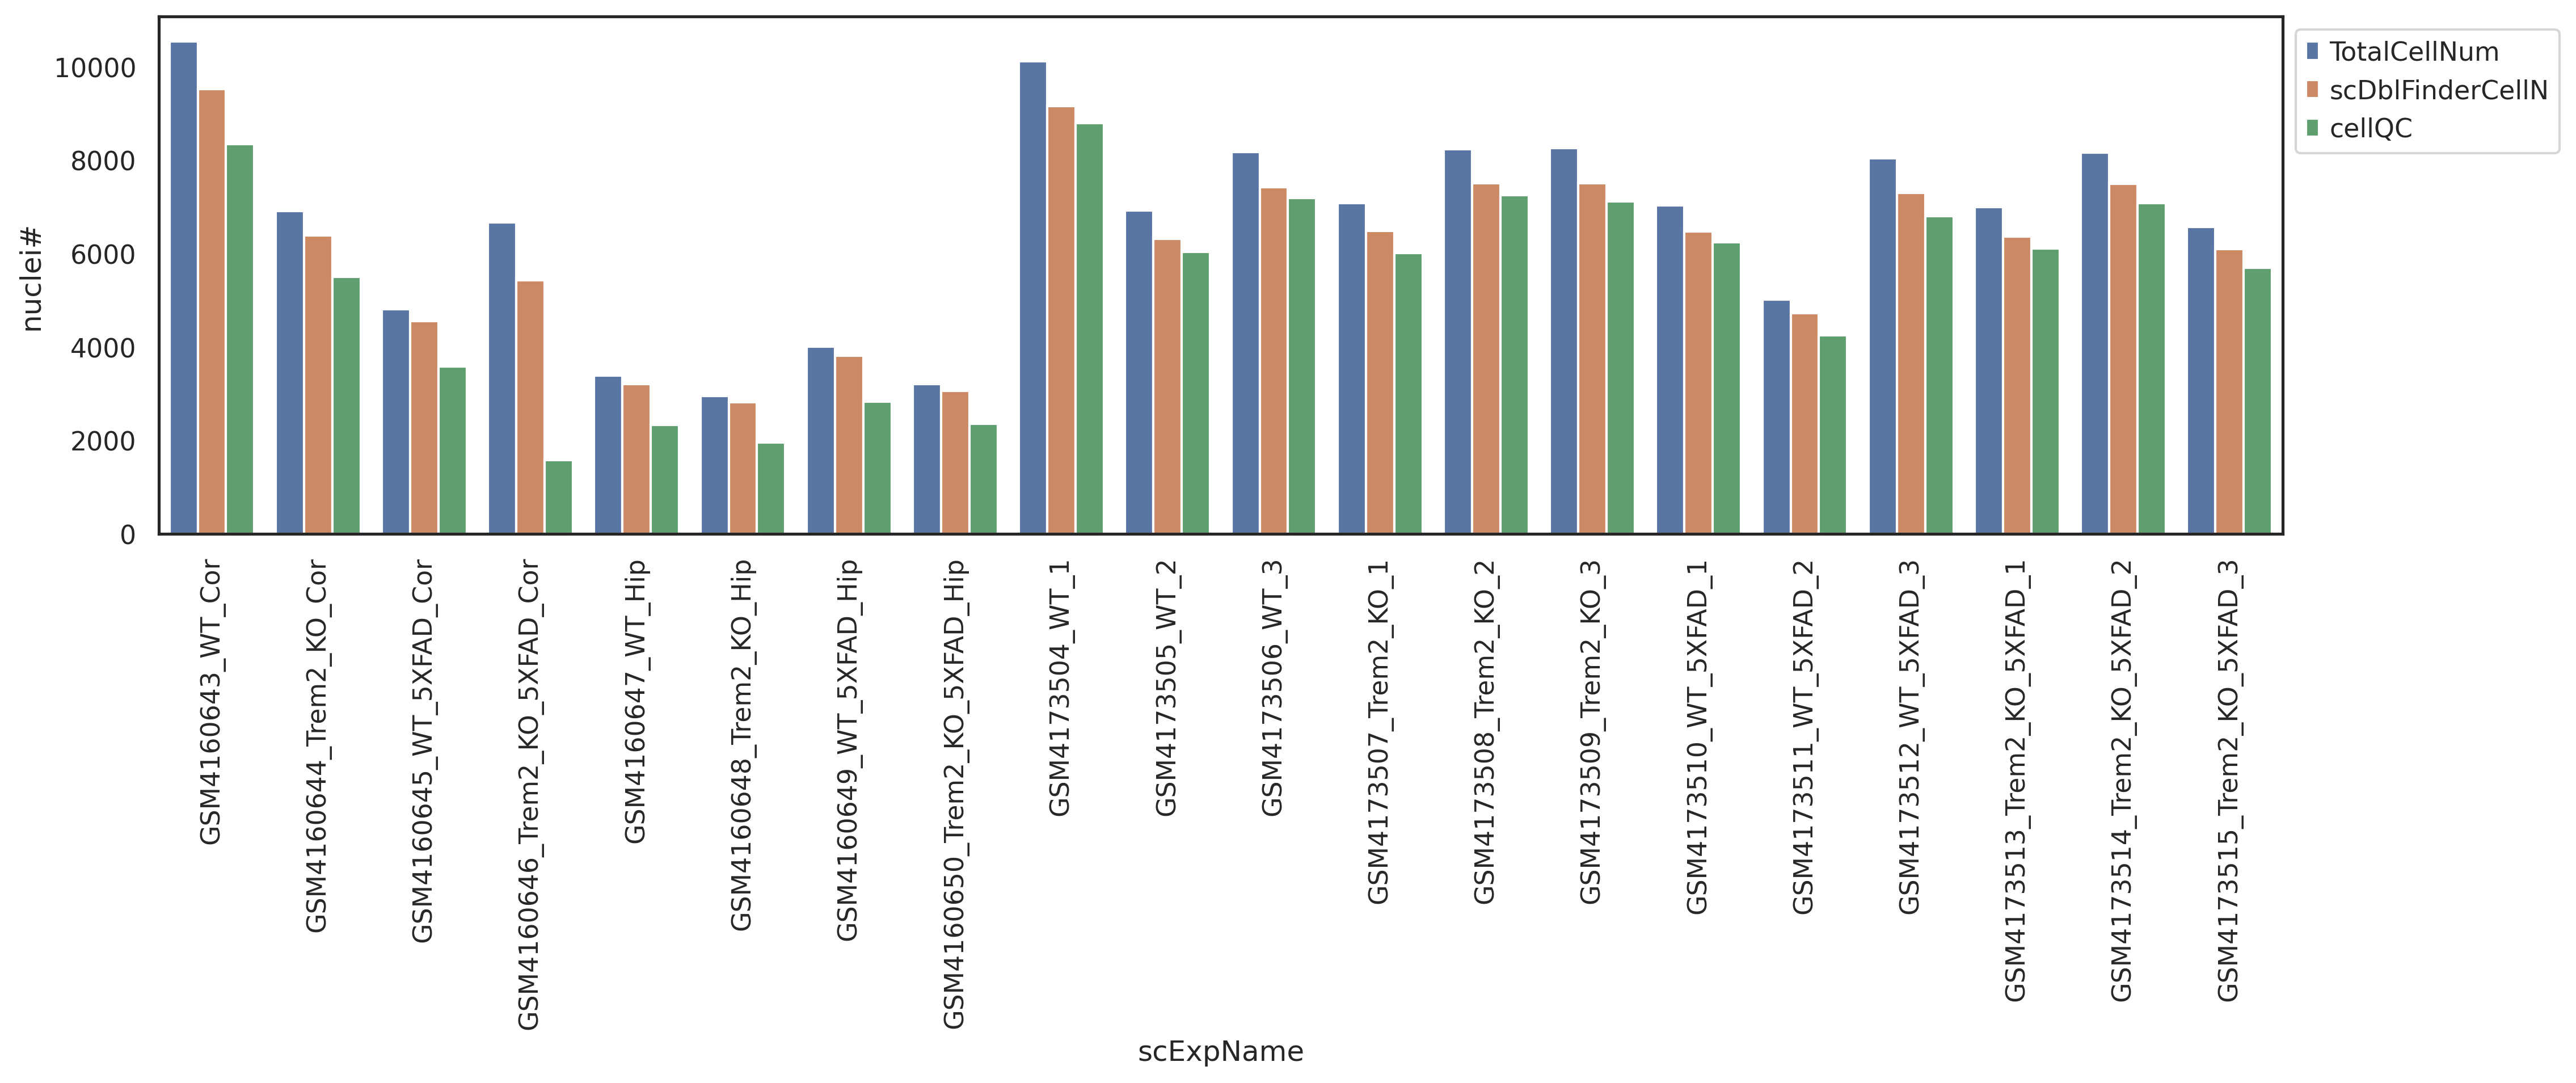

In [48]:
with rc_context({'figure.figsize': (16, 4)}):
    sns.barplot(data=decontxSummaryDf_long, x='scExpName', y='nuclei#', hue='process')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    # plt.savefig(f'{cellqcPicFolderPath}/cellN_summary.pdf', bbox_inches='tight')

In [49]:
cellN_Df.to_csv(f'{cellqcFolder}/cellN_summary.csv', index=False)